# Actividad

- **Nombre**: Benjamin Telles Ramírez 
- **Matrícula**: A01245180

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'

/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
presion_df = pd.read_csv('data/presion.csv', )
presion_df.head()

,edad,presion,Unnamed: 2
0,56,148,NaN
1,45,120,NaN
2,72,159,NaN
3,36,118,NaN
4,63,146,NaN


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


Text(0.5, 1.0, 'Grafíca edad vs presion')

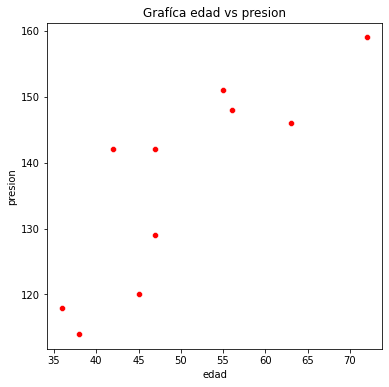

In [5]:
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(data=presion_df, x="edad",y="presion", color="r")
plt.title("Grafíca edad vs presion")

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

Edad
a:  [1.14833319]
b:  79.36850719269533


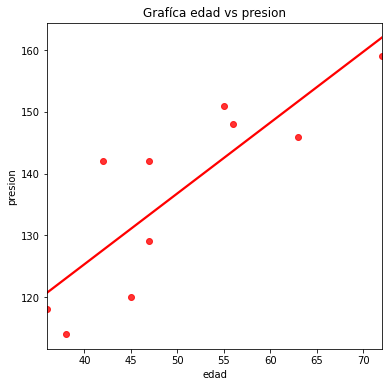

In [6]:
fig = plt.figure(figsize=(6, 6))
sns.regplot(data=presion_df, x='edad',y='presion', ci=None, color='r')
plt.title("Grafíca edad vs presion")
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(presion_df[['edad']], presion_df['presion'])
print('Edad')
print('a: ', lm1.coef_)
print('b: ', lm1.intercept_)

4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'presion')

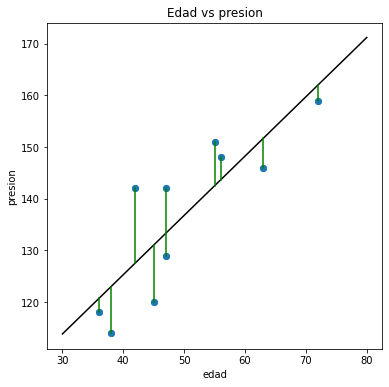

In [8]:
fig = plt.figure(figsize=(6, 6))
x= presion_df["edad"]
y= presion_df["presion"]
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 80,10000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="k");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="g");
plt.title("Edad vs presion")
plt.xlabel("edad")
plt.ylabel("presion")

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [9]:
edad_calcular= 76

def presion(edad):
  pres= (lm1.coef_)*edad + (lm1.intercept_)
  return pres

presion(edad_calcular)
print(" La presion de una persona de 76 años es ", presion(edad_calcular))

 La presion de una persona de 76 años es  [166.64182961]


**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [10]:
negocio_df = pd.read_csv('data/AdvmiNegocio.csv', )
negocio_df.head()

,Unnamed: 0,Redes,Youtube,TV,sales
0,1,6903,1134,2076,663
1,2,1335,1179,1353,312
2,3,516,1377,2079,279
3,4,4545,1239,1755,555
4,5,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


Text(0.5, 1.0, 'TV vs Ventas')

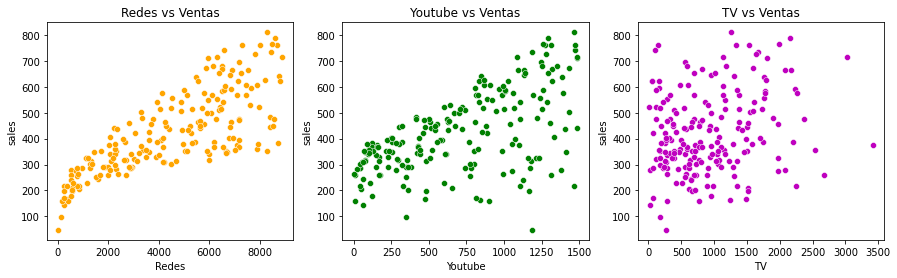

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
sns.scatterplot(data=negocio_df, x='Redes',y='sales', ax=axs[0], ci=None, color='orange')
axs[0].set_title("Redes vs Ventas")
sns.scatterplot(data=negocio_df, x='Youtube',y='sales', ax=axs[1], color='green', ci=None)
axs[1].set_title("Youtube vs Ventas")
sns.scatterplot(data=negocio_df, x='TV',y='sales', ax=axs[2], color='m', ci=None)
axs[2].set_title("TV vs Ventas")

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

**Benjamin Telles:** Se puede visualizar distintos comportamientos que tienen las gráficas del presupuesto empleado en el negocio y las ventas que genera cada medio. Los valores de “Redes” muestran un mayor agrupamiento y una tendencia ascendente, por lo tanto, se cree que este es el mejor modelo en el cual se puede invertir, comparado con las otras dos gráficas que los datos están más dispersos y muestran un menor agrupamiento, por lo que puede causar diferentes resultados a los esperados. Este tipo de gráficas (dispersión de datos) permite visualizar mejor el agrupamiento y la tendencia a que si sólo se visualizarán los datos numéricos.*Ingresa el texto aquí...*

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

In [11]:
#Redes
lm0 = LinearRegression()
lm0.fit(negocio_df[['Redes']], negocio_df['sales'])
print('Redes')
print('beta_0: ', lm0.intercept_)
print('beta_1: ', lm0.coef_)
print('Score: ', lm0.score(negocio_df[['Redes']], negocio_df['sales']), '\n')

# Youtube
lm2 = LinearRegression()
lm2.fit(negocio_df[['Youtube']], negocio_df['sales'])
print('Youtube')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_)
print('Score: ', lm2.score(negocio_df[['Youtube']], negocio_df['sales']), '\n')


# TV
lm3 = LinearRegression()
# La variable X la ponemos con doble corchete!
lm3.fit(negocio_df[['TV']], negocio_df['sales'])
print('TV')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_)
print('Score: ', lm3.score(negocio_df[['TV']], negocio_df['sales']))

Redes
beta_0:  210.97780647383084
beta_1:  [0.04753664]
Score:  0.611875050850071 

Youtube
beta_0:  279.3491428547485
beta_1:  [0.20249578]
Score:  0.33203245544529536 

TV
beta_0:  370.5422120783448
beta_1:  [0.0546931]
Score:  0.05212044544430494


5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

1.-Redes
2.-Youtube
3.-TV

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [ ]:
def score_adj(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
# Redes y Youtube
lm4 = LinearRegression()
lm4.fit(negocio_df[['Redes', 'Youtube']], negocio_df['sales'])
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('betas: ', lm4.coef_)
print('Score: ', lm4.score(negocio_df[['Redes', 'Youtube']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['Redes', 'Youtube']],
                                   negocio_df['sales'], lm4), '\n')

# Redes y TV
lm5 = LinearRegression()
lm5.fit(negocio_df[['TV','Redes']], negocio_df['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('betas: ', lm5.coef_)
print('Score: ', lm5.score(negocio_df[['TV','Redes']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['TV','Redes']],
                                   negocio_df['sales'], lm5), '\n')

# TV y Youtube
lm6 = LinearRegression()
lm6.fit(negocio_df[['TV','Youtube']], negocio_df['sales'])
print('TV y Youtube')
print('beta_0: ', lm6.intercept_)
print('betas: ', lm6.coef_)
print('Score: ', lm6.score(negocio_df[['TV','Youtube']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['TV','Youtube']], 
                                   negocio_df['sales'], lm6), '\n')

## Ahora vamos a comparar el modelo con las tres variables
lm7 = LinearRegression()
lm7.fit(negocio_df[['TV','Redes','Youtube']], negocio_df['sales'])
print('TV, Redes y Youtube')
print('beta_0: ', lm7.intercept_)
print('betas: ', lm7.coef_)
print('Score: ', lm7.score(negocio_df[['TV','Redes','Youtube']], negocio_df['sales']))
print('Score ajustado:', score_adj(negocio_df[['TV','Redes','Youtube']], 
                                   negocio_df['sales'], lm7))

Redes y Youtube
beta_0:  87.63299737215414
betas:  [0.04575482 0.18799423]
Score:  0.8971942610828956
Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734907
betas:  [0.04421942 0.04690121]
Score:  0.6458354938293271
Score ajustado: 0.6422399150864777 

TV y Youtube
beta_0:  275.6676137758969
betas:  [0.00664417 0.19904459]
Score:  0.33270518395032256
Score ajustado: 0.3259306172899198 

TV, Redes y Youtube
beta_0:  88.16668108378269
betas:  [-0.00103749  0.04576465  0.18853002]
Score:  0.8972106381789521
Score ajustado: 0.8956373316204667


7.  ¿Cuál modelo es el que nos conviene elegir?

**Benjamin Telles:** En base al score y el score ajustado, concluí que el mejor modelo es el de “Redes y Youtube”, aunque no es el que muestra mejor score y score ajustado, no genera pérdidas, ya que si se compara contra los parámetros de “TV, Redes y Youtube”, se observa que el presupuesto invertido en TV, generará pérdidas en vez de ganancias, debido a que tiene una pendiente negativa. 